In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from google.colab import files

In [ ]:
# Upload the dataset
uploaded = files.upload()

Saving RCA_V3.csv to RCA_V3.csv


In [ ]:
# Load the data
data = pd.read_csv('RCA_V3.csv', sep=None, engine='python', usecols=['RCA_Main_Root_Cause', 'RCA Defect Domain']).dropna(how='all')
data.columns = ['text', 'label']

# Ensure the 'label' column is treated as a string
data['label'] = data['label'].astype(str)  # Force the label column to be string type

# Convert all text entries to string
data['text'] = data['text'].astype(str)


# Encode the labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
num_classes = len(label_encoder.classes_)

# Preprocess the text data
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, lower=True, oov_token='<OOV>')
tokenizer.fit_on_texts(data['text'].values)
word_index = tokenizer.word_index

X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X, maxlen=max_len)

# Prepare the labels
y = to_categorical(data['label'], num_classes=num_classes)


In [ ]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the RNN model
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {score[0]}')
print(f'Test Accuracy: {score[1]}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 37s 266ms/step - accuracy: 0.2240 - loss: 2.0156 - val_accuracy: 0.2883 - val_loss: 1.8846
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 30s 175ms/step - accuracy: 0.3530 - loss: 1.7806 - val_accuracy: 0.4670 - val_loss: 1.5528
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 22s 187ms/step - accuracy: 0.5478 - loss: 1.3639 - val_accuracy: 0.5082 - val_loss: 1.4239
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 187ms/step - accuracy: 0.6365 - loss: 1.1009 - val_accuracy: 0.5323 - val_loss: 1.4000
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 39s 172ms/step - accuracy: 0.6972 - loss: 0.9166 - val_accuracy: 0.5577 - val_loss: 1.3917
Epoch 6/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 23s 192ms/step - accuracy: 0.7467 - loss: 0.7774 - val_accuracy: 0.5716 - val_loss: 1.4308
Epoch 7/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step - accuracy: 0.7928 - loss: 0.6644 - val_accuracy: 0.5779 - val_loss: 1.4435
Epoch 8/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - accuracy: 0.8123 - loss: 0

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report # Import the necessary metrics functions

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
Precision: 0.5663789071653337
Recall: 0.5604813172894236
F1 Score: 0.5525804976344582

Classification Report:

                precision    recall  f1-score   support

        Design       0.60      0.74      0.67       325
Implementation       0.44      0.29      0.35       145
   Integration       0.45      0.61      0.52       271
         Other       0.62      0.43      0.50       131
   Realization       0.57      0.59      0.58       326
     Releasing       1.00      0.33      0.50         9
  Requirements       0.64      0.59      0.61       246
          Test       0.57      0.26      0.36        87
           nan       0.72      0.54      0.62        39

      accuracy                           0.56      1579
     macro avg       0.62      0.49      0.52      1579
  weighted avg       0.57      0.56      0.55      1579



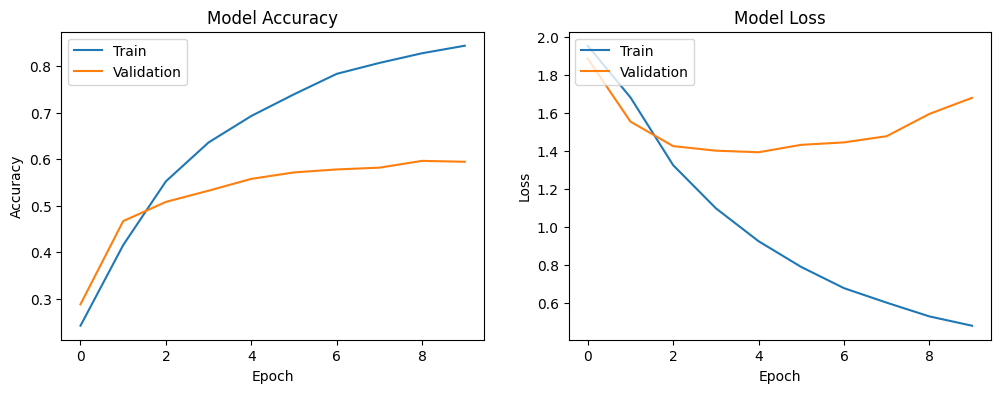

In [ ]:
# Plot training & validation accuracy and loss values
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


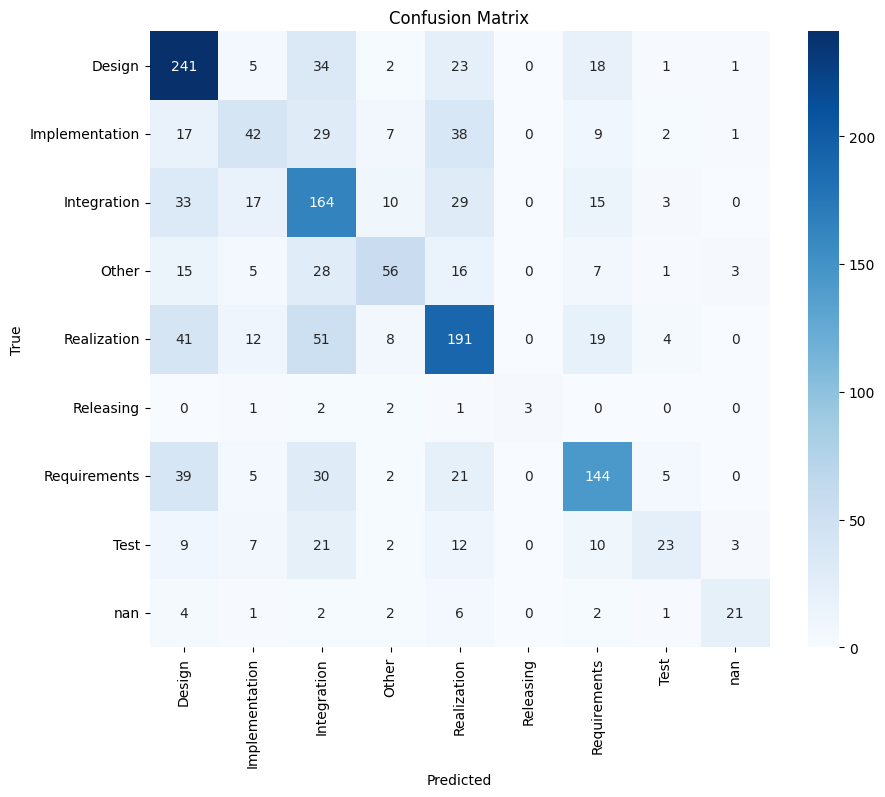

In [ ]:

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()